## Linear Regression

Motivations
 - 주어진 데이터에 대해서 결과를 반환하는 함수를 모사하자.

 - 세상에는 선형 동작하는 함수들이 많다.
    * 예) 키 vs 몸무게, 나이 vs 연봉


선형 데이터들을 분석하여, 입력(x)가 주어졌을 때 알맞은 출력(y)를 뱉어내자.

**Parameter Optimization using Gradient Descent**
* input_size = n
* output_size = m

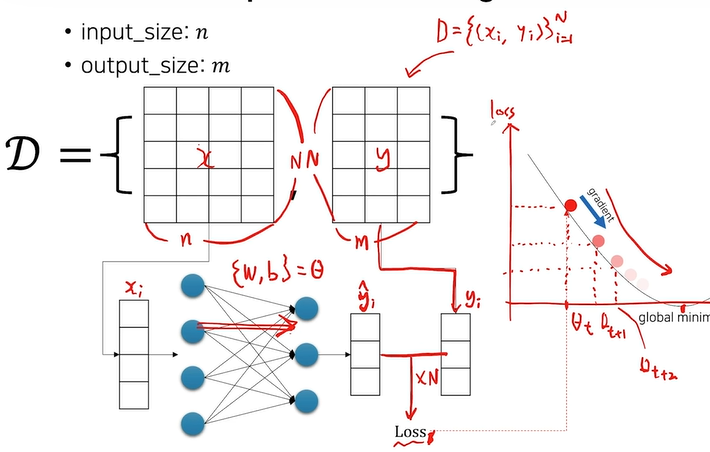

### Load Dataset from sklearn

In [2]:
!pip install matplotlib seaborn pandas sklearn

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()

# 데이터 확인하기
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["Target"] = boston.target
df.tail() #마지막 5개 확인하기


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


 boston.data를 넣었을 때 boston.target의 데이터를 통해서 데이터를 통해서 집값을 추론할 수 있다.

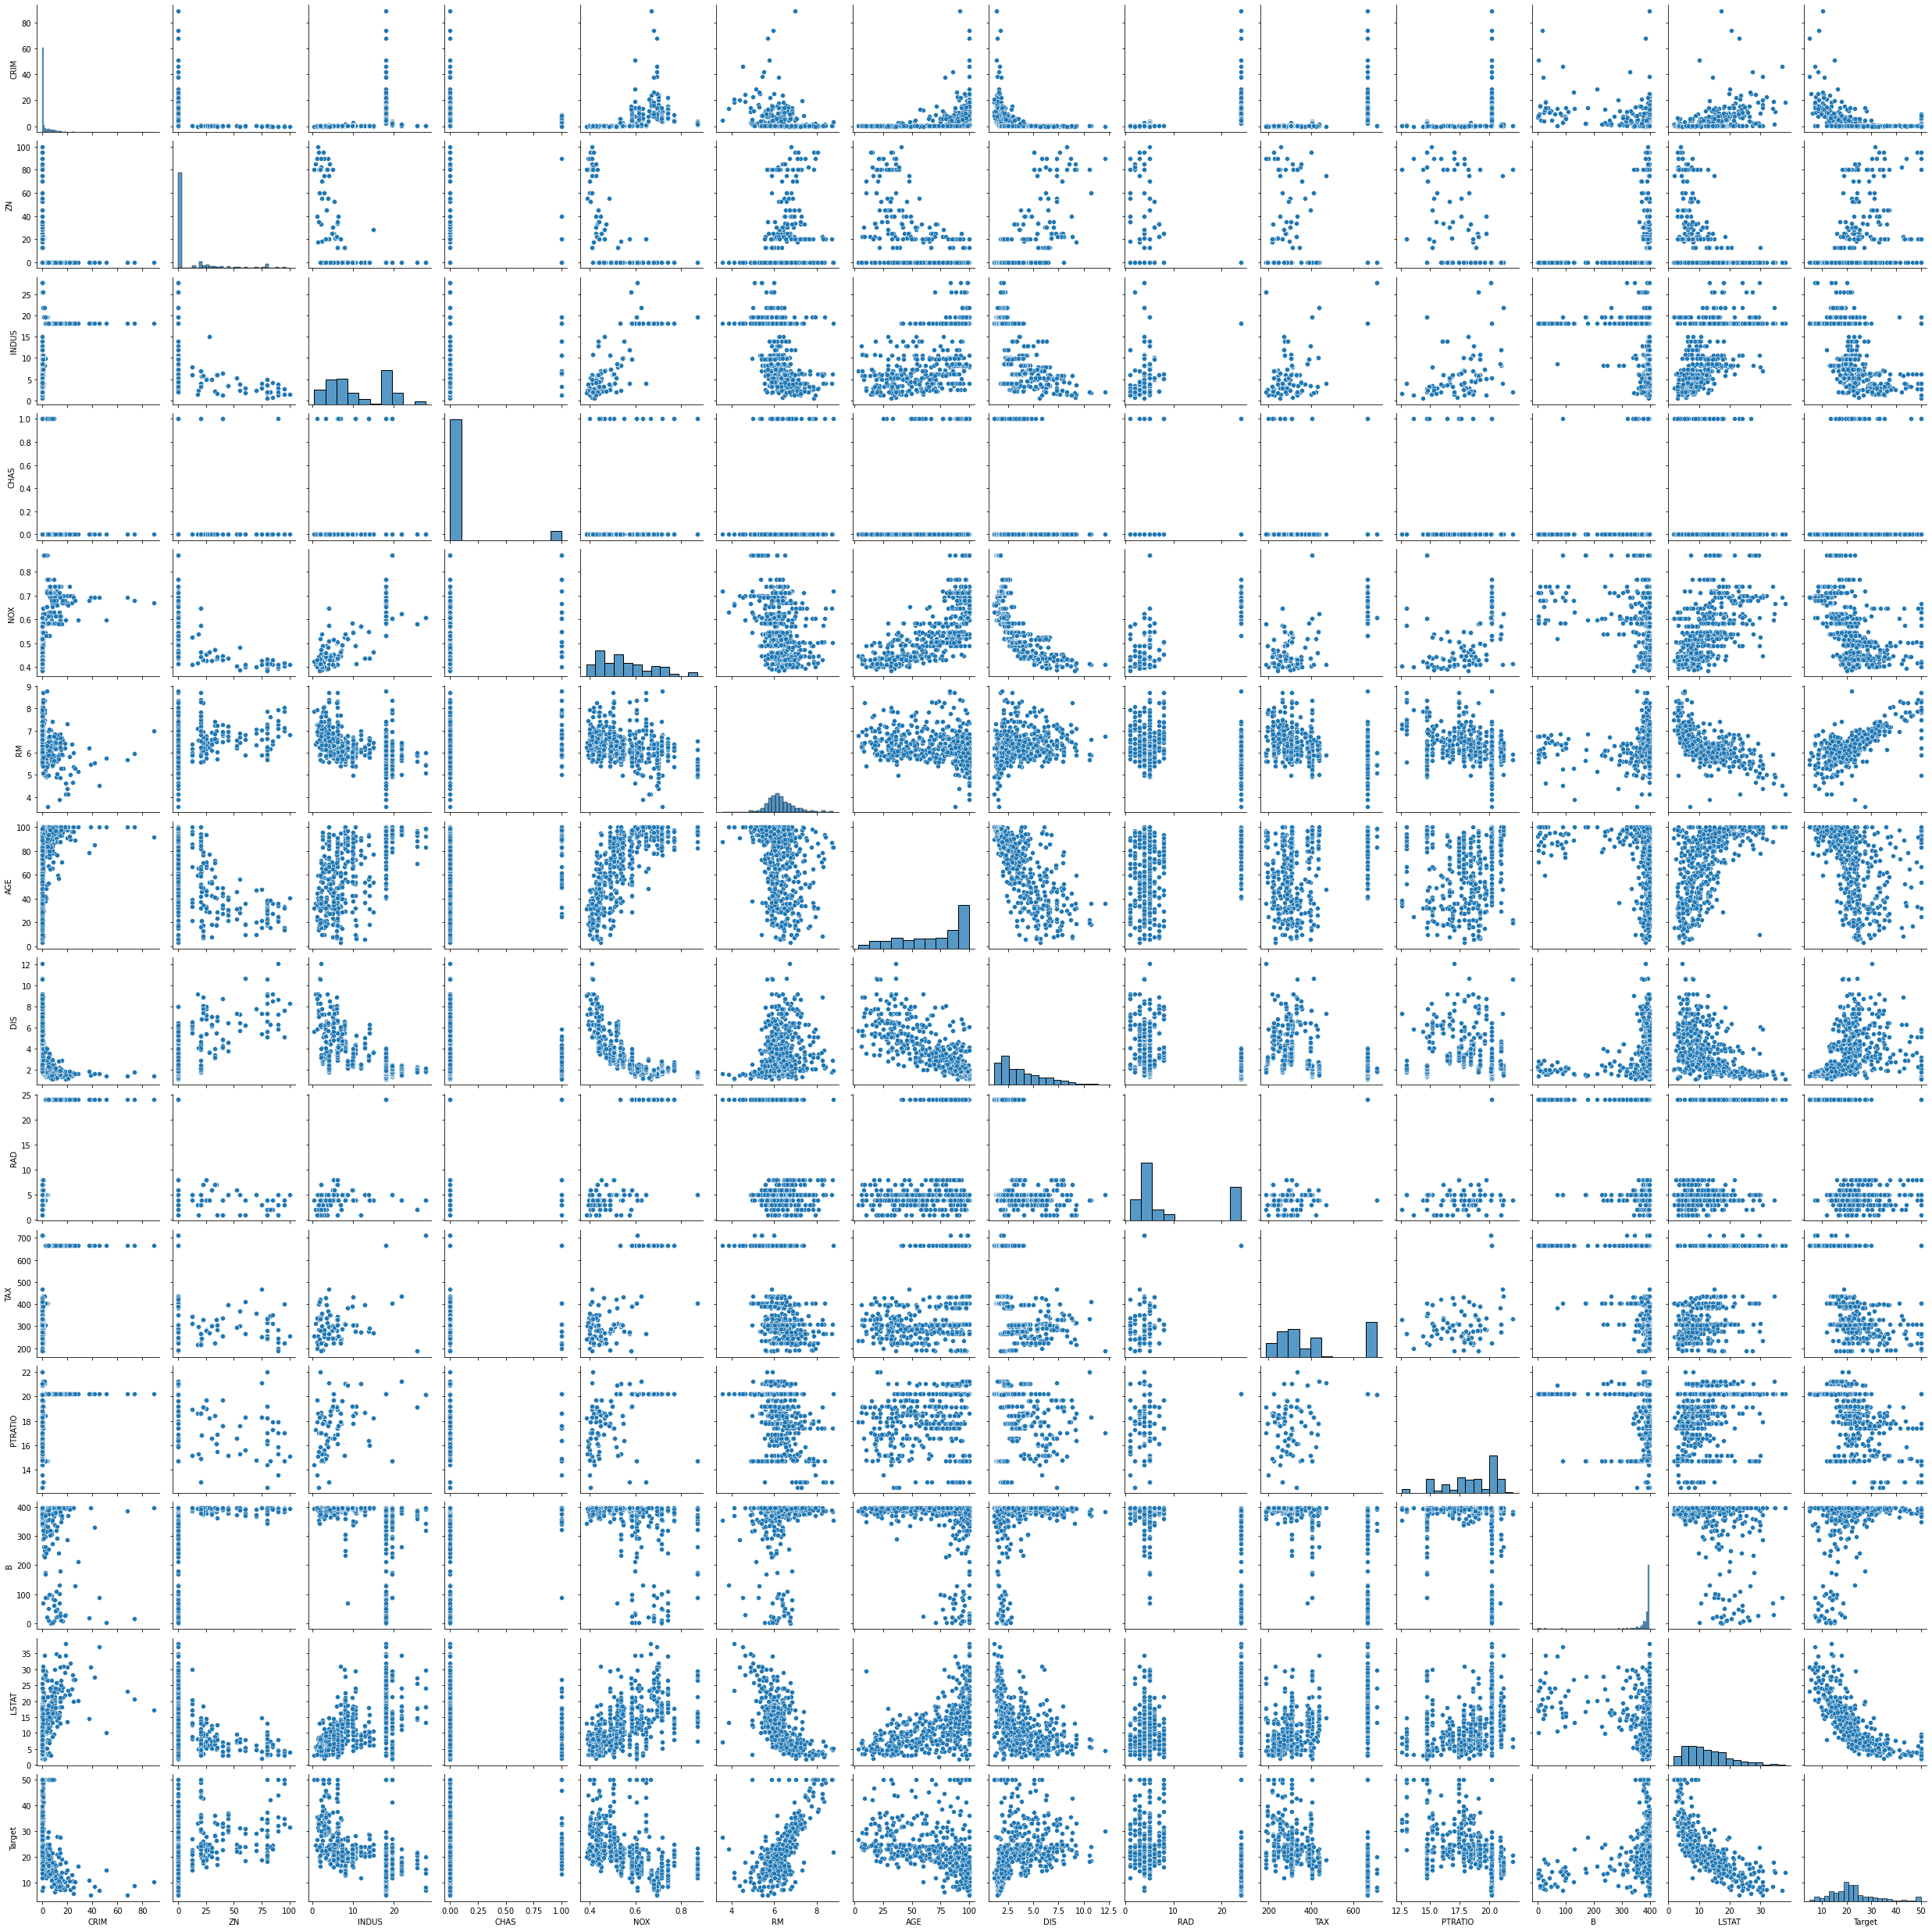

In [25]:
# seaborn의 pairplot을 통해서 13개의 속성과 target에 대해서 확인할 수 있음
# 두 attribute간의 관계를 파악할 수 있다.
sns.pairplot(df)
plt.show()

In [28]:
# 5개의 속성 값을 통해서 target을 예측해보자
cols = ["Target","INDUS","RM","LSTAT","NOX","DIS"]

In [29]:
df[cols].describe()

,Target,INDUS,RM,LSTAT,NOX,DIS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,11.136779,6.284634,12.653063,0.554695,3.795043
std,9.197104,6.860353,0.702617,7.141062,0.115878,2.105710
min,5.000000,0.460000,3.561000,1.730000,0.385000,1.129600
25%,17.025000,5.190000,5.885500,6.950000,0.449000,2.100175
50%,21.200000,9.690000,6.208500,11.360000,0.538000,3.207450
75%,25.000000,18.100000,6.623500,16.955000,0.624000,5.188425
max,50.000000,27.740000,8.780000,37.970000,0.871000,12.126500


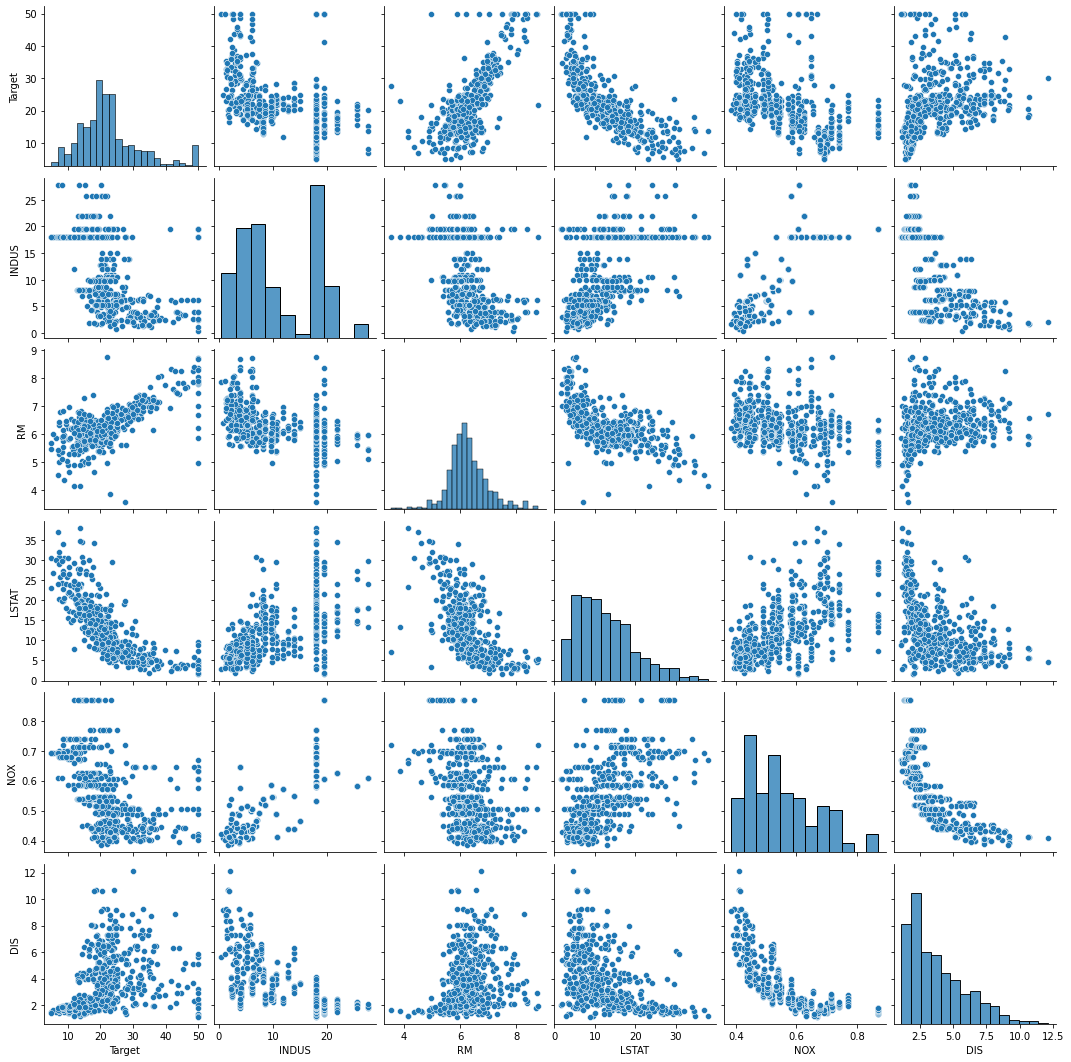

In [30]:
sns.pairplot(df[cols])
plt.show()

## Train Linear Model With Pytorch

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [34]:
data = torch.from_numpy(df[cols].values).float() #pandas -> numpy, double -> float
data.shape # target + 5개 속성

torch.Size([506, 6])

In [38]:
# Split x and y
y = data[:,:1]
x = data[:,1:]

print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [39]:
# Define configurations (설정값 설정)
n_epochs = 1000
learning_rate = 1e-3 #learning_rate값을 크게 잘못 지정하면 값이 솟구쳐서 overshooting될 수 있음
print_interval = 100

In [40]:
# Define model 

model = nn.Linear(x.size(-1), y.size(-1))

model

Linear(in_features=5, out_features=1, bias=True)

In [41]:
optimizer = optim.SGD(model.parameters(),
                      lr = learning_rate)

In [43]:
# whole training samples are used in 1 epoch.
for i in range(n_epochs):
  y_hat = model(x)
  loss = F.mse_loss(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1) % print_interval == 0:
    print('Epoch %d: loss-%.4e' % (i+1, loss))

Epoch 100: loss-4.4400e+01
Epoch 200: loss-3.7617e+01
Epoch 300: loss-3.3856e+01
Epoch 400: loss-3.1736e+01
Epoch 500: loss-3.0542e+01
Epoch 600: loss-2.9868e+01
Epoch 700: loss-2.9488e+01
Epoch 800: loss-2.9274e+01
Epoch 900: loss-2.9152e+01
Epoch 1000: loss-2.9084e+01


## Let's see the result!

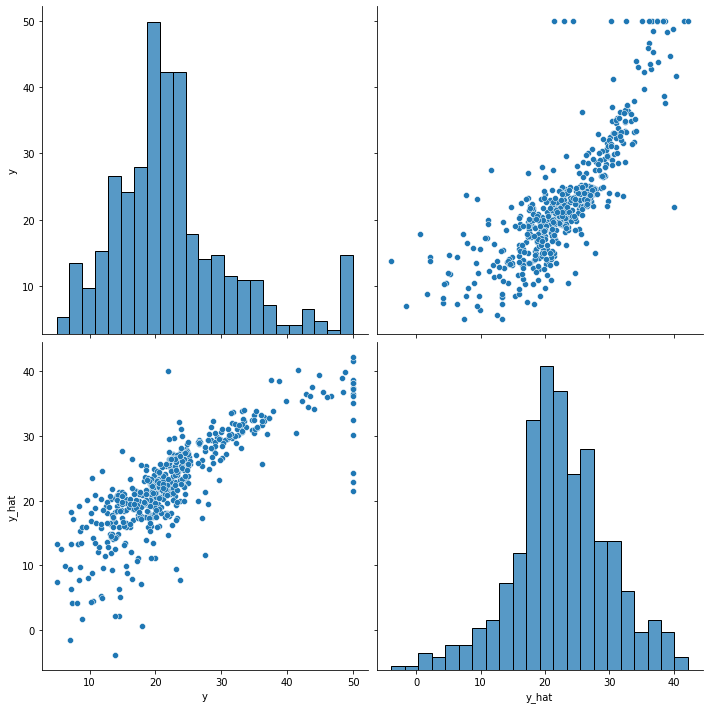

In [46]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(),
                  columns=["y","y_hat"])

sns.pairplot(df, height=5)
plt.show()